### Crop and fertilizer recommendation using ML

In [2]:
# Importing necessary libraries
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


In [3]:
# Loading the dataset
crop=pd.read_csv("Data set/Crop_recommendation.csv")

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# to check the missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# TO check duplicate values
crop.duplicated().sum()

np.int64(0)

In [10]:
#To check the statics of data set
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
# For target distribution
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [13]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


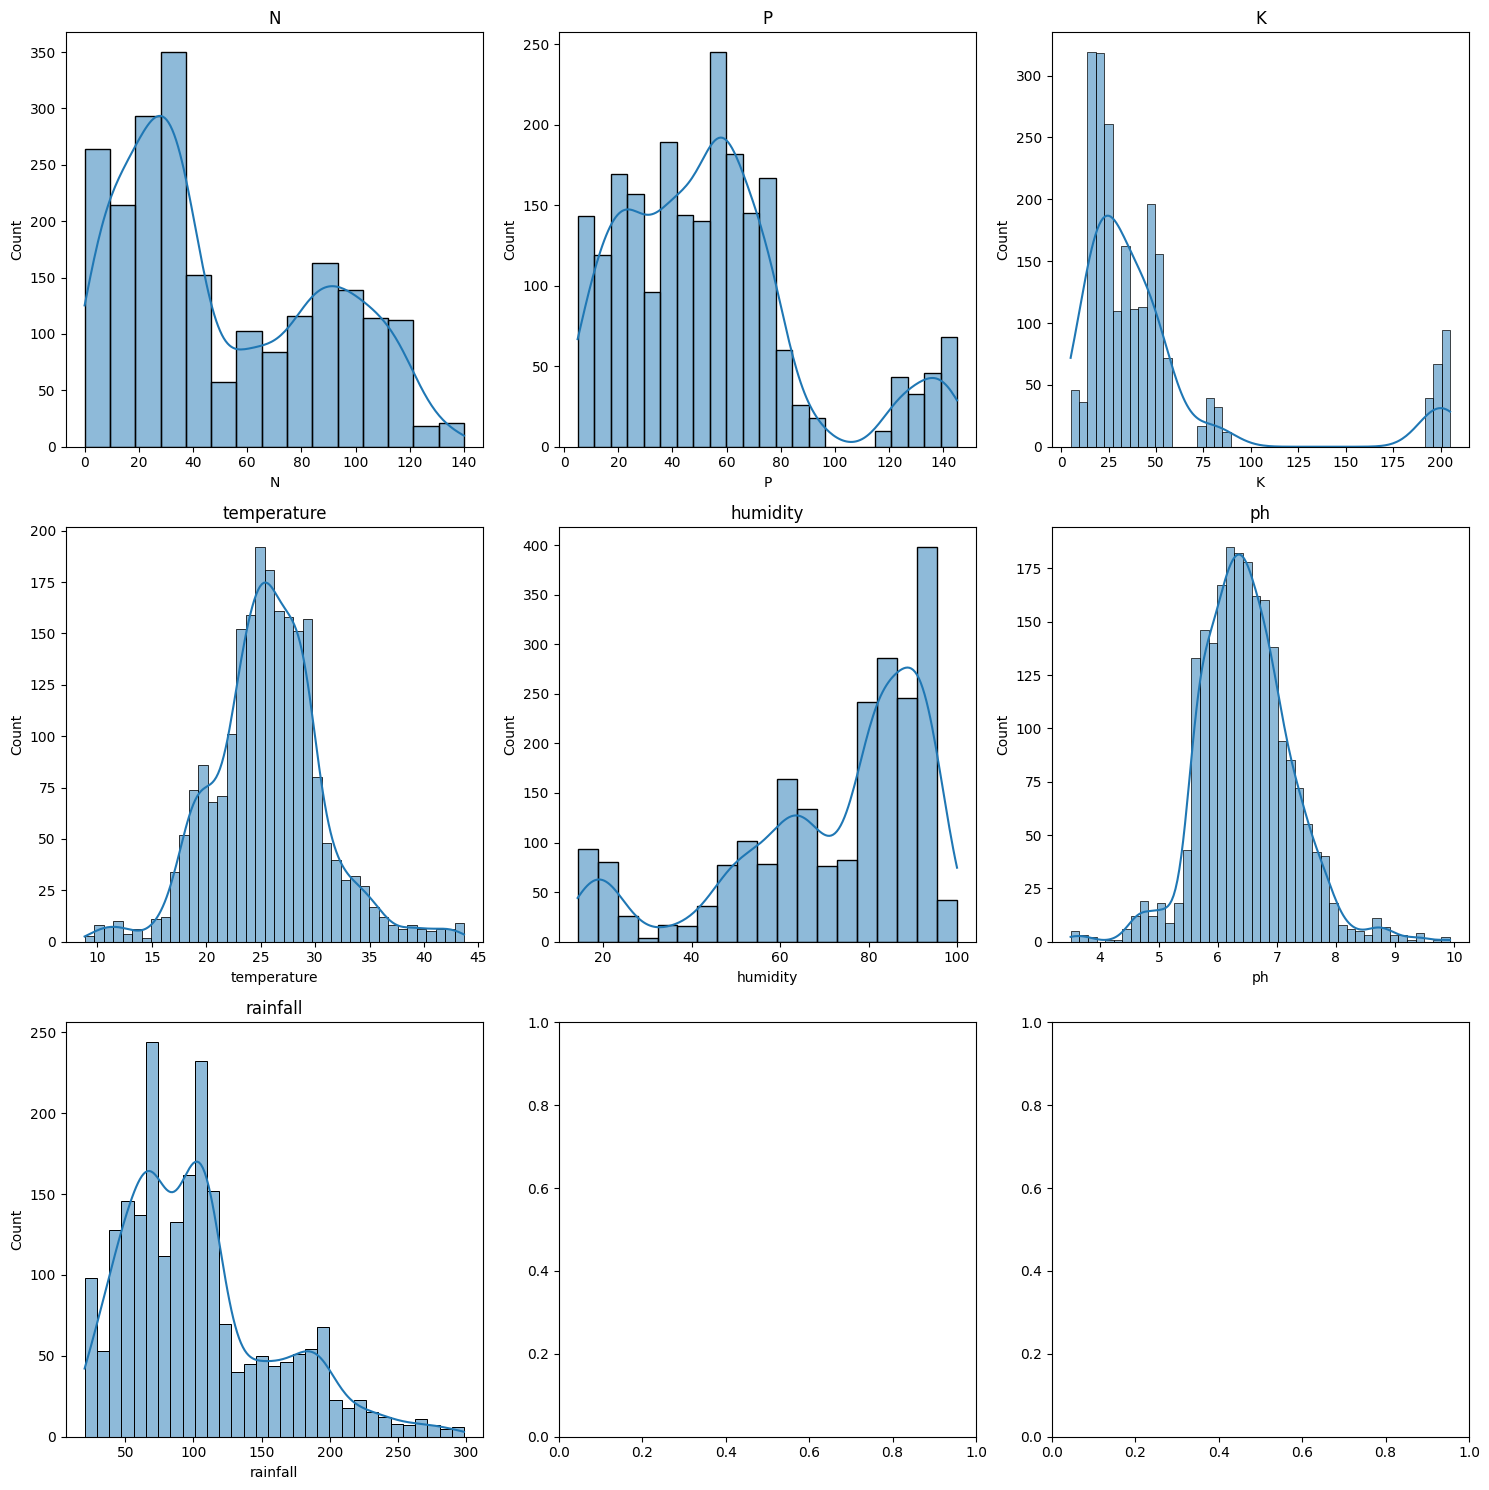

In [14]:
# Visualize the distribution of each feature
import seaborn as sns                                                       # type: ignore
fig, ax = plt.subplots(3,3,figsize=(15,15))
for i,subplot in zip(features,ax.flatten()):
    sns.histplot(crop[i],ax=subplot,kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

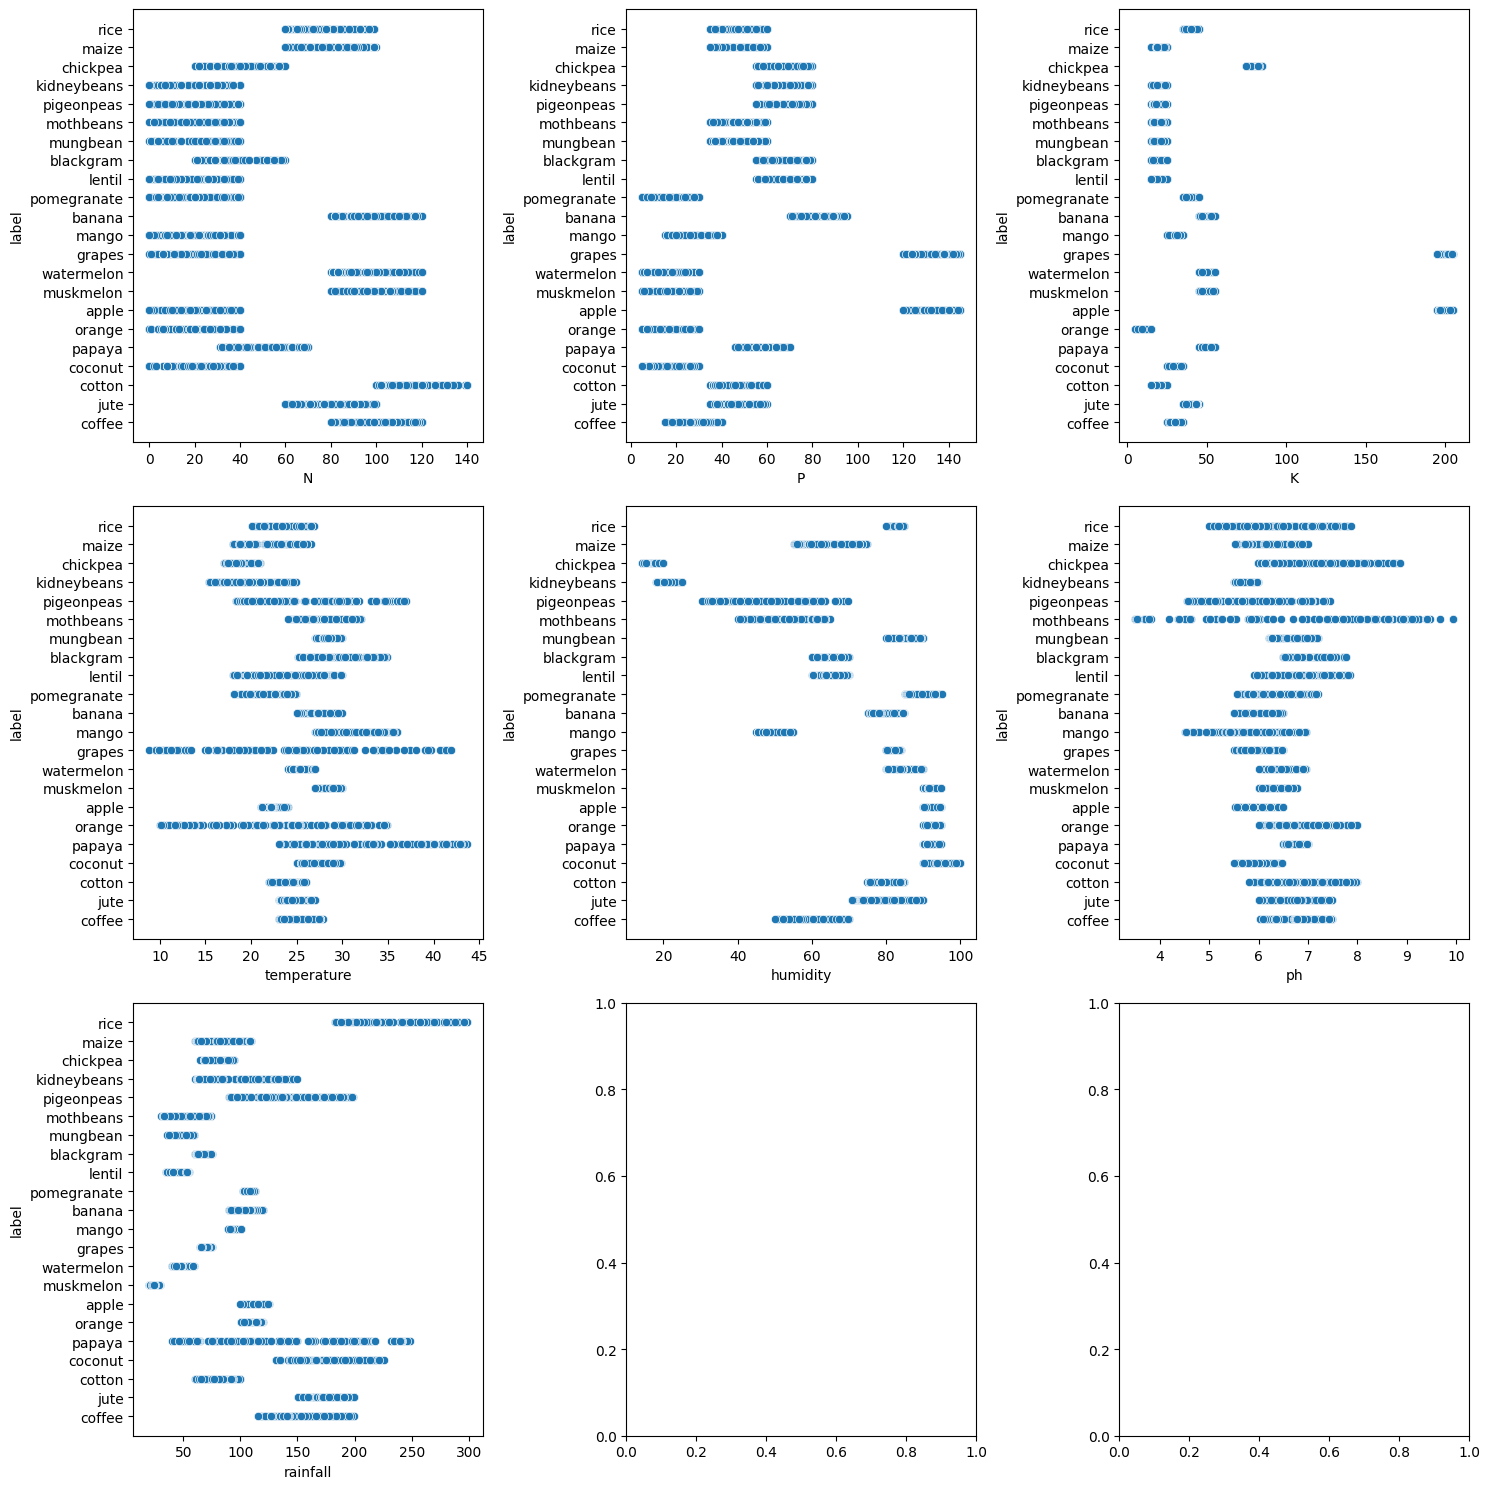

In [15]:
# Plotting scatter plot
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i, subplots in zip(features,ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplots)
plt.tight_layout()
plt.show()
    

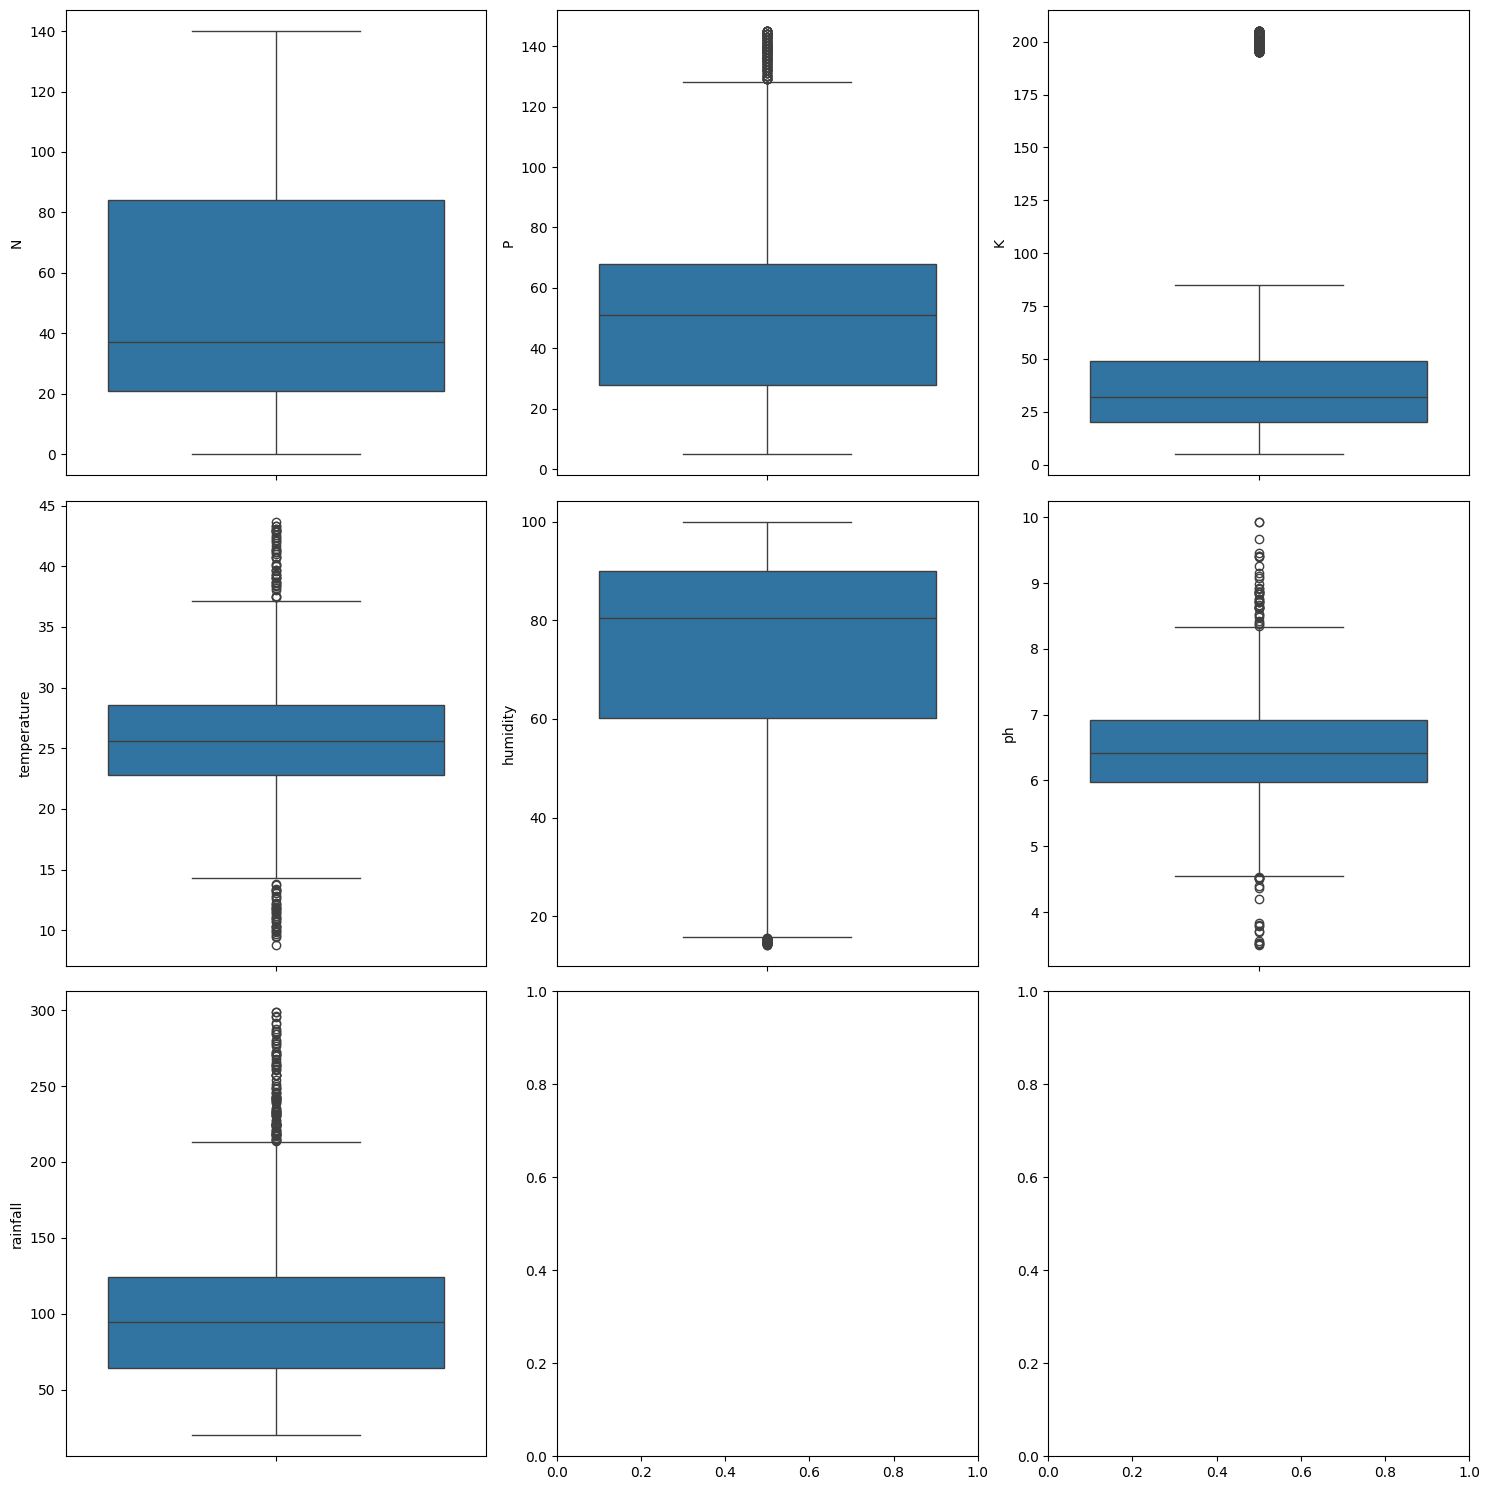

In [16]:
# Finding outliers - boxplot
fig, ax = plt.subplots(3,3, figsize=(15,15))
 
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
 
plt.tight_layout()
plt.show()

In [17]:
# Corelation of the features
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [18]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

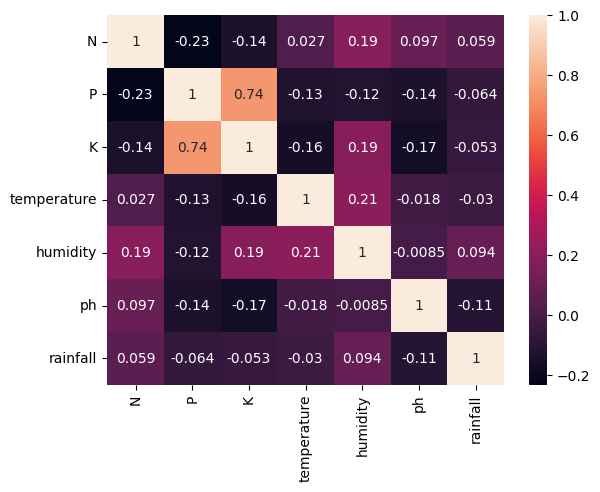

In [19]:
# Visualizing with Heatamp
sns.heatmap(corr, annot=True)


<Axes: >

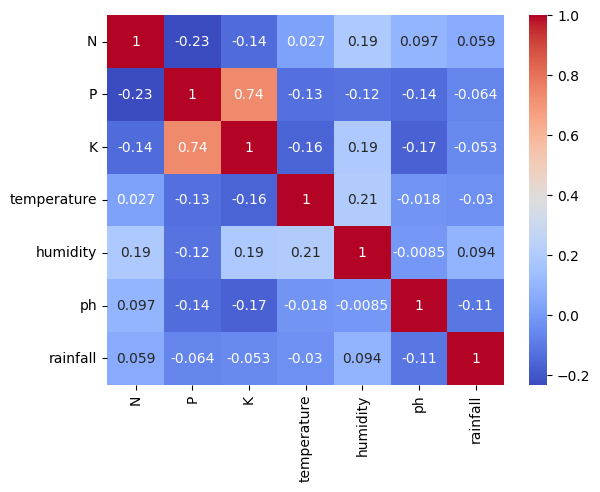

In [20]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Encoding

In [21]:
crop ['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [22]:
crop_dict ={
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'blackgram': 9,
    'lentil': 10,
    'pomegranate': 11,
    'banana': 12,
    'mango': 13,
    'grapes': 14,
    'watermelon': 15,
    'muskmelon': 16,
    'apple': 17,
    'orange': 18,
    'papaya': 19,
    'coconut': 20,
    'cotton': 21,
    'jute': 22,
    'coffee': 23,
}

In [23]:
crop['crop_no']= crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [24]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,23
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,23
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,23
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,23
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,23


In [25]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,23
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,23
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,23
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,23
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,23


In [26]:
# Train Test Split
X= crop.drop('crop_no',axis=1)
y=crop['crop_no']


In [27]:
X.shape

(2200, 7)

In [ ]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [29]:
X_train.shape

(1760, 7)

In [30]:
X_test.shape

(440, 7)

In [31]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Training the model
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import accuracy_score # type: ignore


In [33]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
y_pred = dtc.predict(X_test)
acs = accuracy_score(y_test, y_pred)
print('Accuracy:', acs)

Accuracy: 0.9818181818181818


In [35]:
# Prediction 
import numpy as np   # type: ignore
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed_features = scaler.transform(features)
    prediction = dtc.predict(transformed_features).reshape(1, -1)
    crop_dict= crop_dict= {
    1: 'rice',
    2: 'maize',
    3: 'chickpea',
    4: 'kidneybeans',
    5: 'pigeonpeas',
    6: 'mothbeans',
    7: 'mungbean',
    8: 'blackgram',
    9: 'lentil',
    10: 'pomegranate',
    11: 'banana',
    12: 'mango',
    13: 'grapes',
    14: 'watermelon',
    15: 'muskmelon',
    16: 'apple',
    17: 'orange',
    18: 'papaya',
    19: 'coconut',
    20: 'cotton',
    21: 'jute',
    22: 'coffee',
    }
    crop=[crop_dict[i] for i in prediction[0]]
    return f"{crop} is the best crop to grow"

In [36]:
# Testing the function
N= 90
P= 42
K= 43
temperature= 14
humidity= 82
ph= 6
rainfall= 2
crop_rec = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(crop_rec)

['apple'] is the best crop to grow


c:\Users\Vatsal Modi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Vatsal Modi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9818181818181818

In [38]:
# model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.89      0.87        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.92      0.96        24
           7       1.00      1.00      1.00        19
           9       0.95      1.00      0.98        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        17
          17       1.00      1.00      1.00        23
          18       1.00      1.00      1.00        14
          19       1.00    

In [39]:
# confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,

## For Fertilizer Recommendation

In [41]:
# For Fertilizer Recommendation
# Loading the dataset
fertilizer= pd.read_csv("Data set/Fertilizer Prediction.csv")


In [43]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [44]:
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [45]:
fertilizer.shape

(99, 9)

In [46]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [47]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [48]:
fertilizer.duplicated().sum()

np.int64(0)

In [53]:
fertilizer.describe()  

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [58]:
fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [59]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

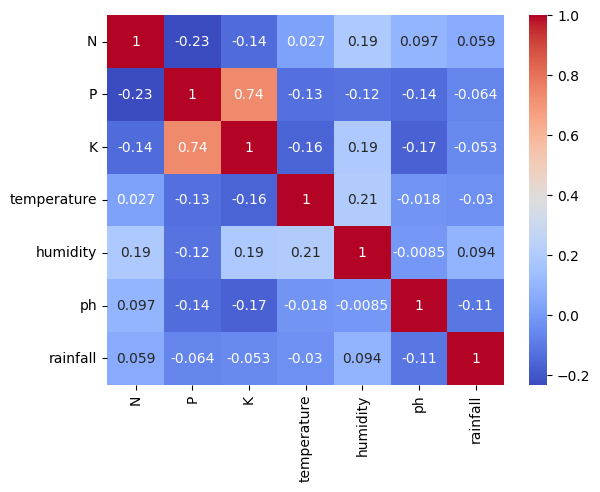

In [62]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

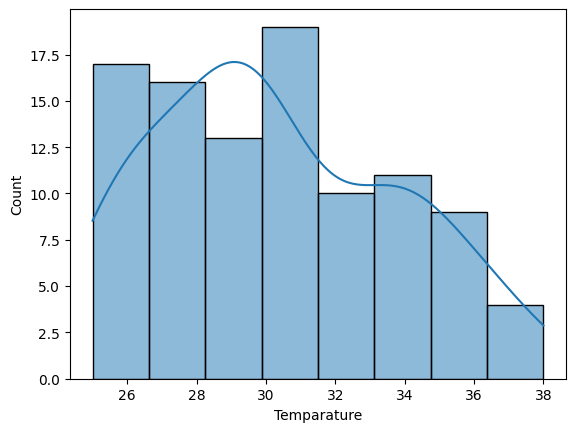

In [63]:
sns.histplot(fertilizer['Temparature'], kde=True)
plt.show()

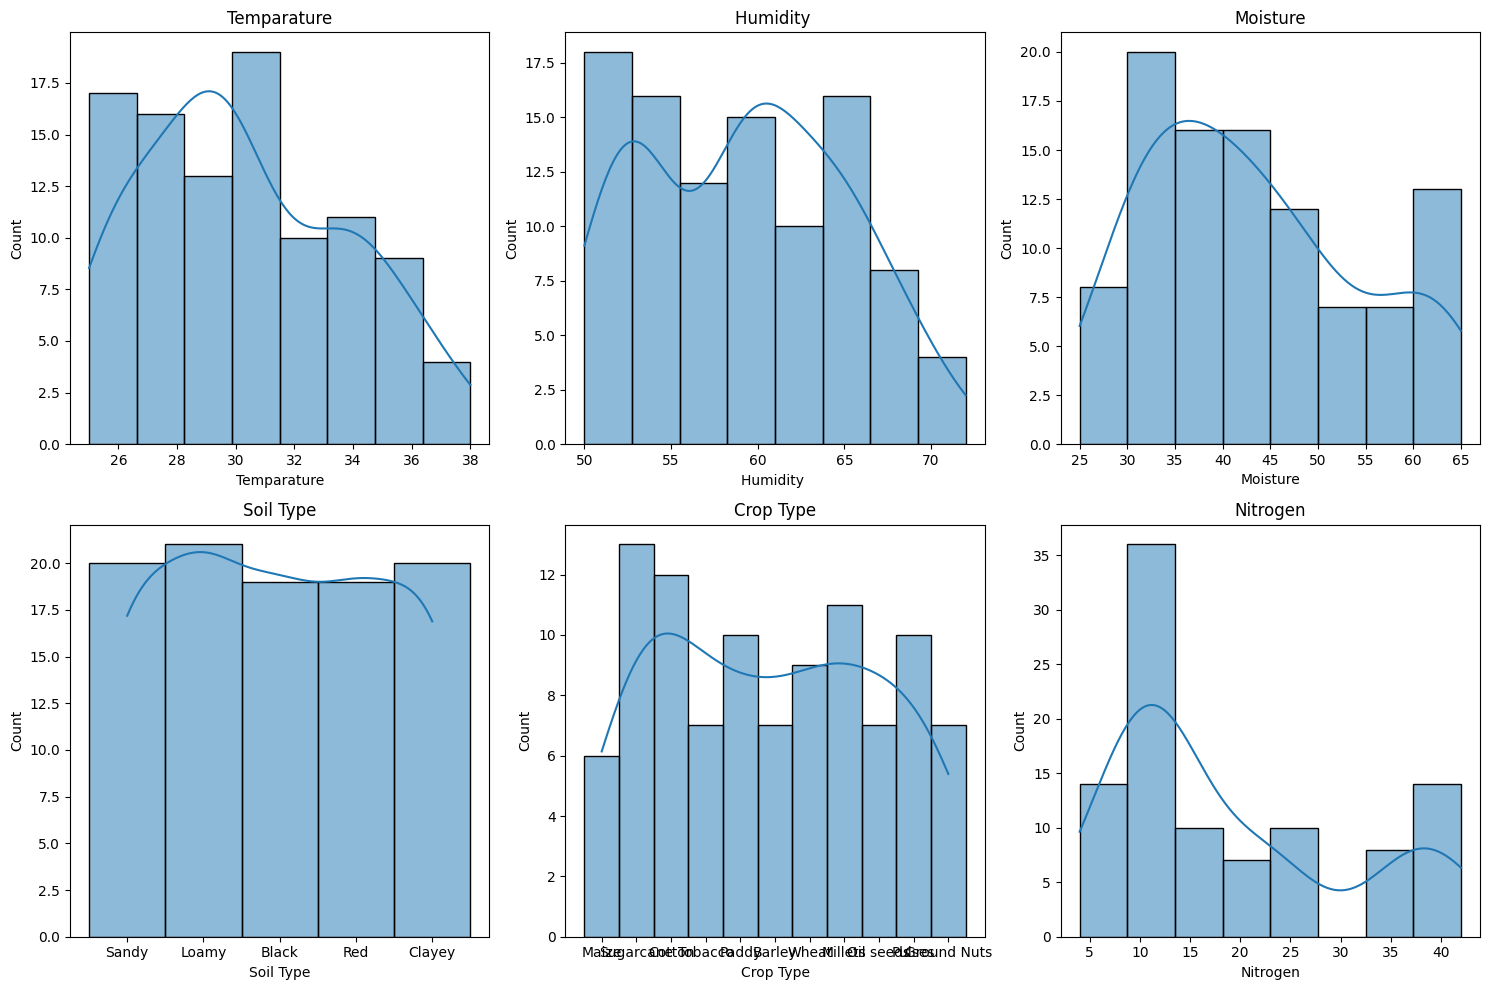

In [64]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

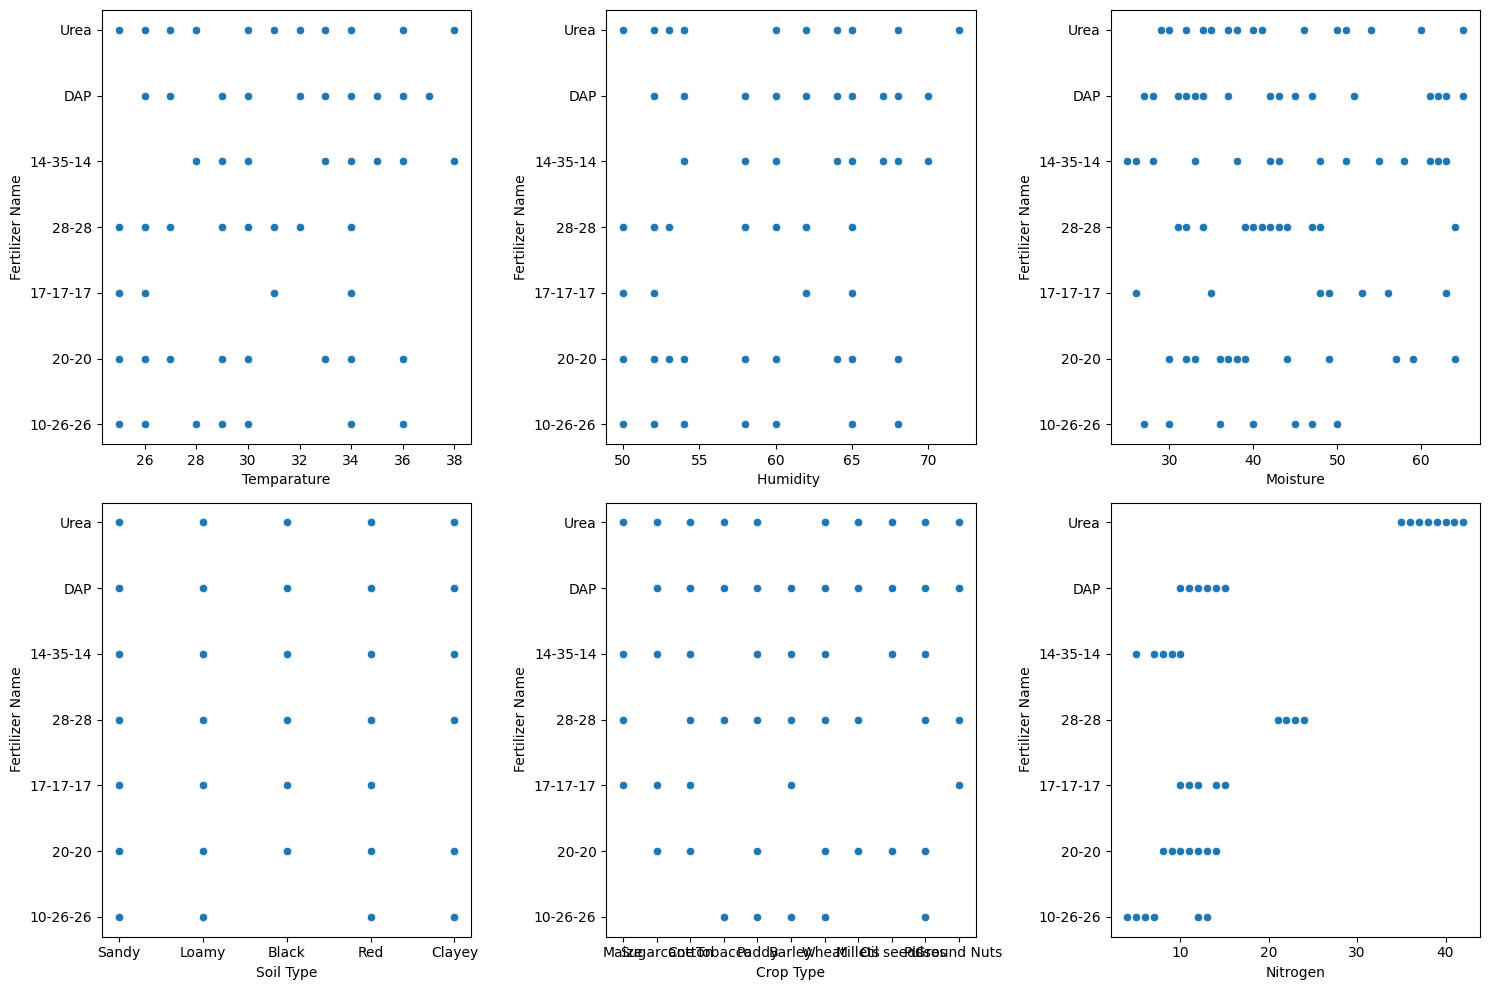

In [65]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

In [70]:
fert_dict = {
'Urea': 1,   
 'DAP': 2,
 '28-28': 3, 
'14-35-14': 4,
'20-20': 5,
'17-17-17': 6,
'10-26-26': 7,
}

In [72]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [73]:
fertilizer['fert_no'].value_counts()

fert_no
1    22
2    18
3    17
4    14
5    14
6     7
7     7
Name: count, dtype: int64

In [74]:
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,4
3,32,62,34,Red,Tobacco,22,0,20,3
4,28,54,46,Clayey,Paddy,35,0,0,1


In [76]:
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [78]:
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

NameError: name 'LabelEncoder' is not defined

In [79]:
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [80]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [90]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical features
label_encoder = LabelEncoder()
fertilizer['Soil Type'] = label_encoder.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type'] = label_encoder.fit_transform(fertilizer['Crop Type'])

# Splitting the data
x = fertilizer.drop('fert_no', axis=1)
y = fertilizer['fert_no']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
model = DecisionTreeClassifier()

In [92]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [94]:
#accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [108]:
# Prediction
def predict_fertilizer(N, P, K, temperature, humidity, moisture , soil,crop ):
    features = np.array([[N, P, K, temperature, humidity,moisture, soil,crop]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1, -1)
    fert_dict = {
        1: 'Urea',   
        2: 'DAP',
        3: '28-28', 
        4: '14-35-14',
        5: '20-20',
        6: '17-17-17',
        7: '10-26-26',
    }
    fert = [fert_dict[i] for i in prediction[0]]
    return f"{fert} is the best fertilizer to use"

In [114]:
# Testing the function
N = 90
P = 42
K = 43
temprature = 21
humidity = 82
moisture= 7 
soil= 1
crop = 5

predict_fertilizer (N, P, K, temperature, humidity, moisture, rainfall,crop)



c:\Users\Vatsal Modi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['17-17-17'] is the best fertilizer to use"